In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection as skms
import sklearn.metrics as skm
import sklearn.datasets as skds
import sklearn.preprocessing as skpp
import sklearn.neural_network as sknn

In [ ]:
x, y = skds.fetch_openml("mnist_784", version=1, return_X_y = True)

In [ ]:
pow(78,0.5)

784

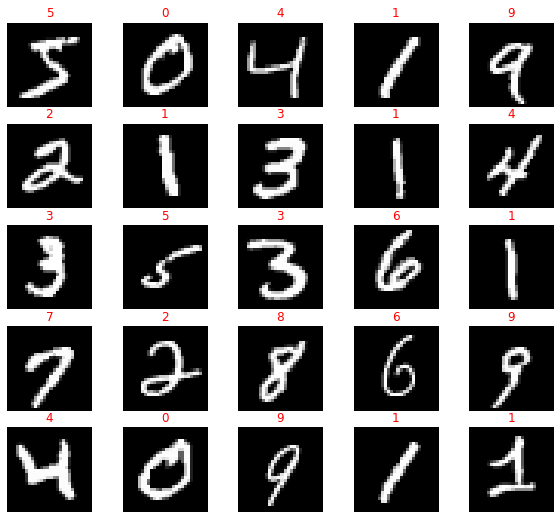

In [ ]:
plt.figure(figsize=(10,9))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x[i].reshape(28,28), cmap="gray")
  plt.title(y[i], color='red')
  plt.axis("off")
plt.show()

In [ ]:
xtrain, xtest, ytrain, ytest = skms.train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
escalador=skpp.MinMaxScaler()
xtrain_escalado = escalador.fit_transform(xtrain)
xtest_escalado = escalador.fit_transform(xtest)

# Perceptron multicapa

In [ ]:
capas_ocultas = (64,64)
modelo =sknn.MLPClassifier(hidden_layer_sizes=capas_ocultas,
                   activation='relu',
                   solver='adam',
                   alpha=0.05,
                   max_iter=10000)
modelo.fit(xtrain_escalado, ytrain)

MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 64), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print("score training set: ", modelo.score(xtrain_escalado, ytrain))
print("score test set: ", modelo.score(xtest_escalado, ytest))

score training set:  0.9977321428571428
score test set:  0.9763571428571428


In [ ]:
len(modelo.coefs_)

3

In [ ]:
modelo.coefs_[0].shape
#conecta los 784 valores de X con los 64 nodos de la 1ra capa
#64 de la primera capa con 64 de la segunda
#64 de la segunda capa con 10 de la salida
for i in modelo.coefs_:
  print(i.shape)

(784, 64)
(64, 64)
(64, 10)


<function matplotlib.pyplot.show>

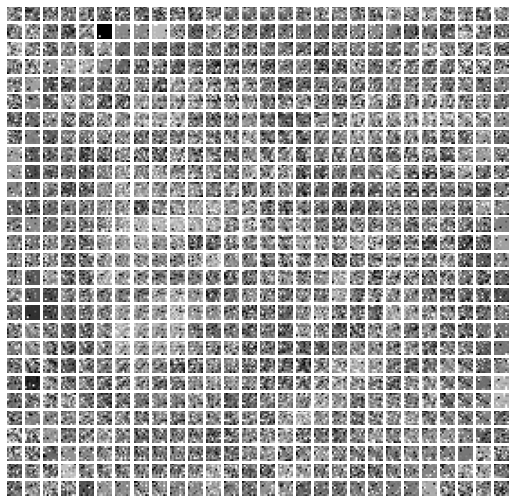

In [ ]:
plt.figure(figsize = (9,9))
for i, img in enumerate(modelo.coefs_[0]):
  plt.subplot(28, 28, i+1)
  plt.imshow(img.reshape(8,8), cmap="gray")
  plt.axis("off")
plt.show

<function matplotlib.pyplot.show>

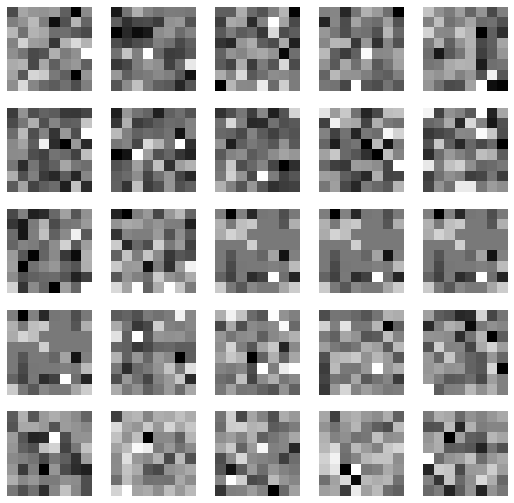

In [ ]:
plt.figure(figsize = (9,9))
for i in range(25):
  img =modelo.coefs_[0][i]
  plt.subplot(5, 5, i+1)
  plt.imshow(img.reshape(8,8), cmap="gray")
  plt.axis("off")
plt.show

<function matplotlib.pyplot.show>

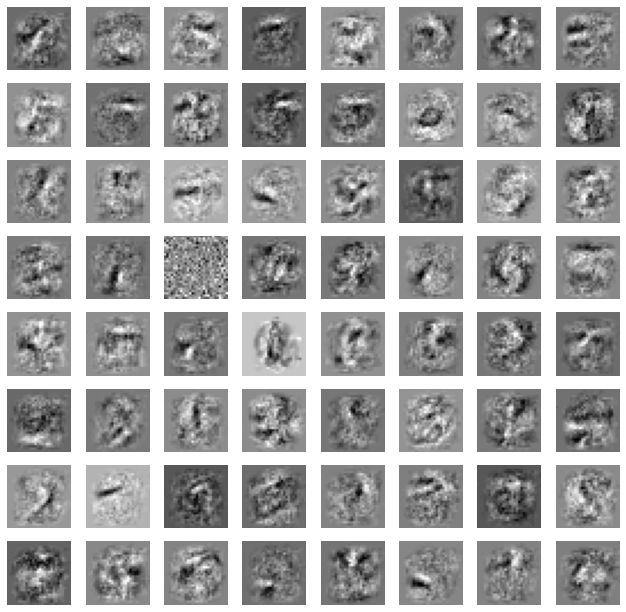

In [ ]:
plt.figure(figsize = (11,11))
for i, img in enumerate(modelo.coefs_[0].T):
  plt.subplot(8, 8, i+1)
  plt.imshow(img.reshape(28,28), cmap="gray")
  plt.axis("off")
plt.show

In [ ]:
modelo.predict([xtest_escalado[1]])

array(['4'], dtype='<U1')

In [ ]:
modelo.predict_proba(xtest_escalado[1].reshape(1,784))

array([[2.13480081e-11, 4.22211091e-12, 8.91555380e-09, 6.41046935e-09,
        9.99999216e-01, 2.95779887e-08, 2.84841298e-10, 2.27240510e-07,
        1.34913761e-08, 4.97626180e-07]])

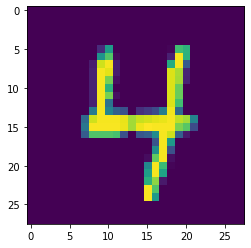

In [ ]:
plt.imshow(xtest_escalado[1].reshape(28,28))

Text(0.5, 1.0, "['1']")

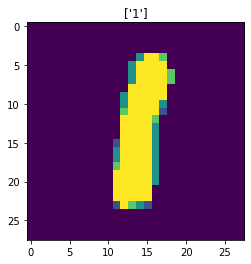

In [ ]:
modelo.predict_proba(xtest_escalado[7].reshape(1,784))
plt.imshow(xtest_escalado[7].reshape(28,28))
plt.title(modelo.predict(xtest_escalado[7].reshape(1,784)))

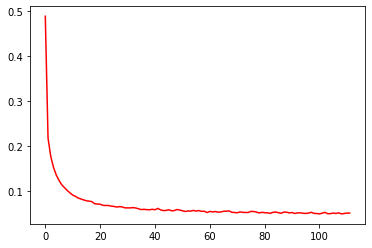

In [ ]:
plt.plot(modelo.loss_curve_, 'r-')

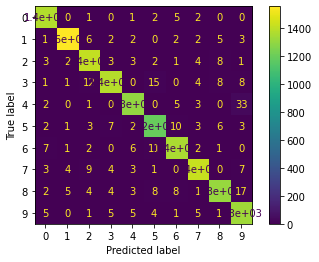

In [ ]:
skm.plot_confusion_matrix(modelo, xtest_escalado, ytest)

# Deep Learning

In [ ]:
import tensorflow.keras as ke

In [ ]:
capa_entrada = ke.layers.Input(shape=(28,28))

capa_densa1 = ke.layers.Dense(64, activation="relu")(capa_entrada)
dropout1 = ke.layers.Dropout(0.1 )(capa_densa1)

capa_densa2 = ke.layers.Dense(16,activation="relu")(dropout1)
dropout2 = ke.layers.Dropout(0.1)(capa_densa2)

flat = ke.layers.Flatten()(dropout2)
capa_salida = ke.layers.Dense(10, activation="softmax")(flat)

modelod = ke.models.Model(inputs=[capa_entrada], outputs=[capa_salida])
modelod.summary()

In [ ]:
modelod.compile(optimizer="adam", loss= "categorical_crossentropy",
                metrics=["accuracy"]    )
xtrain_shape = (len(xtrain), 28, 28)
xtest_shape = (len(xtest), 28, 28)

historial=modelod.fit(xtrain_escalado.reshape(xtrain_shape),
            ke.utils.to_categorical(ytrain,10),
            epochs=30, batch_size=5000, verbose=1,
            validation_split=0.2
            )


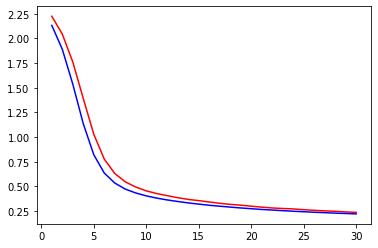

In [ ]:
loss = historial.history["loss"] #error en el trining set
val_loss = historial.history["val_loss"] #error en el validation set
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, color="red")
plt.plot(epochs, val_loss, color="blue")
plt.show()


Extendiendo el entrenamiento

In [ ]:
historial = modelod.fit(xtrain_escalado.reshape(xtrain_shape), 
            ke.utils.to_categorical(ytrain,10),
            epochs=30, batch_size=5000, verbose=1,
            validation_split=0.2
            )

In [ ]:
loss = historial.history["loss"] #error en el trainning set
val_loss = historial.history["val_loss"] #error en el validation set
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,color="red")
plt.plot(epochs,val_loss,color="blue")
plt.show()

Probando con una pequeña red convolucional

In [ ]:
capa_entrada = ke.layers.Input(shape=(28,28,1))
capa = ke.layers.Conv2D(64,(5,5), strides=(1,1), padding="same")(capa_entrada)
capa = ke.layers.Dropout(0.1)(capa)
capa = ke.layers.Activation("relu")(capa)
capa = ke.layers.MaxPool2D((2,2))(capa)
capa = ke.layers.Flatten()(capa)
capa_salida = ke.layers.Dense(10,activation="softmax")(capa)
modelod = ke.models.Model(inputs=capa_entrada,outputs=capa_salida)
modelod.summary()

In [ ]:
modelod.compile(optimizer="adam", loss = "categorical_crossentropy",
                metrics=["accuracy"])

xtrain_shape = (len(xtrain),28,28,1)
xtest_shape = (len(xtest),28,28,1)

historial = modelod.fit(xtrain_escalado.reshape(xtrain_shape), 
            ke.utils.to_categorical(ytrain,10),
            epochs=30, batch_size=5000, verbose=1,
            validation_split=0.2
            )

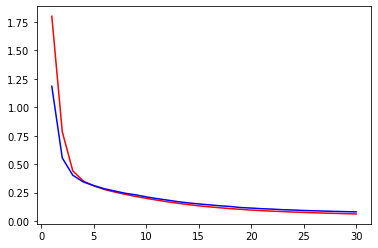

In [ ]:
loss = historial.history["loss"] #error en el trainning set
val_loss = historial.history["val_loss"] #error en el validation set
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,color="red")
plt.plot(epochs,val_loss,color="blue")
plt.show()